# Customer segmentation based on their Credit card data-Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('credit_card.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.shape

(8950, 18)

In [5]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

1) CUSTID: Identification of Credit Card holder (Categorical)
2) BALANCE: Balance amount left in their account to make purchases
3) BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4) PURCHASES: Amount of purchases made from account
5) ONEOFFPURCHASES: Maximum purchase amount done in one-go
6) INSTALLMENTSPURCHASES: Amount of purchase done in installment
7) CASHADVANCE: Cash in advance given by the user
8) PURCHASESFREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9) ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10) PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11) CASHADVANCEFREQUENCY: How frequently the cash in advance being paid
12) CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"
13) PURCHASESTRX: Number of purchase transactions made
14) CREDITLIMIT: Limit of Credit Card for user
15) PAYMENTS: Amount of Payment done by user
16) MINIMUM_PAYMENTS: Minimum amount of payments made by user
17) PRCFULLPAYMENT: Percent of full payment paid by user
18) TENURE: Tenure of credit card service for user


In [6]:
# handling null values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
# handling duplicates
df.duplicated().sum()

0

In [8]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [9]:
df.dropna(inplace=True)
df.shape

(8636, 18)

In [10]:
# data loss= 8950-8636/8950=0.035= 3.5%

In [11]:
df.iloc[:,1:].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [12]:
for i in df.columns:
    print(f'{i} - {df[i].nunique()}')

CUST_ID - 8636
BALANCE - 8631
BALANCE_FREQUENCY - 42
PURCHASES - 6015
ONEOFF_PURCHASES - 3922
INSTALLMENTS_PURCHASES - 4341
CASH_ADVANCE - 4206
PURCHASES_FREQUENCY - 47
ONEOFF_PURCHASES_FREQUENCY - 47
PURCHASES_INSTALLMENTS_FREQUENCY - 47
CASH_ADVANCE_FREQUENCY - 54
CASH_ADVANCE_TRX - 65
PURCHASES_TRX - 173
CREDIT_LIMIT - 203
PAYMENTS - 8636
MINIMUM_PAYMENTS - 8635
PRC_FULL_PAYMENT - 47
TENURE - 7


In [13]:
df['TENURE'].value_counts()

12    7346
11     356
10     226
6      184
8      183
7      177
9      164
Name: TENURE, dtype: int64

In [14]:
df.groupby('TENURE').agg({'BALANCE':['min','max','mean'],'PAYMENTS':['min','max','mean'],'MINIMUM_PAYMENTS':['min','max','sum','mean']})

BALANCE                              PAYMENTS                \
             min           max         mean        min           max   
TENURE                                                                 
6       0.271854   9601.071318  1164.108583   3.500505  19998.389690   
7       1.753241   8220.740014  1056.384486  16.385421  18091.013470   
8       0.422555  15258.225900  1188.638180  32.924384   8113.297346   
9       1.045584   7919.563494  1170.333758   0.049513   7313.426958   
10      0.126562   9559.783145  1303.456834  45.214284  26557.097240   
11      2.022170  13318.659120  1669.360185  46.969049  20873.221940   
12      0.000000  19043.138560  1651.058147   0.056466  50721.483360   

                    MINIMUM_PAYMENTS                                          
               mean              min           max           sum        mean  
TENURE                                                                        
6        702.876737         7.221665   7256.951816  6.293566e+04  342.041651  
7        851.269689         1.519351   7243.733403  7.274069e+04  410.964335  
8        900.059658         0.311953   3905.740148  7.835270e+04  428.156856  
9       1016.396056         1.334075  10057.561920  8.957622e+04  546.196474  
10      1169.071423         4.363375   3422.988223  1.059096e+05  468.626654  
11      1590.866629        17.826933  26378.907820  3.465849e+05  973.552999  
12      1901.550542         0.019163  76406.207520  6.708038e+06  913.155148

In [15]:
data = df.iloc[:,1:]
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

## EXPLORATORY DATA ANALYSIS

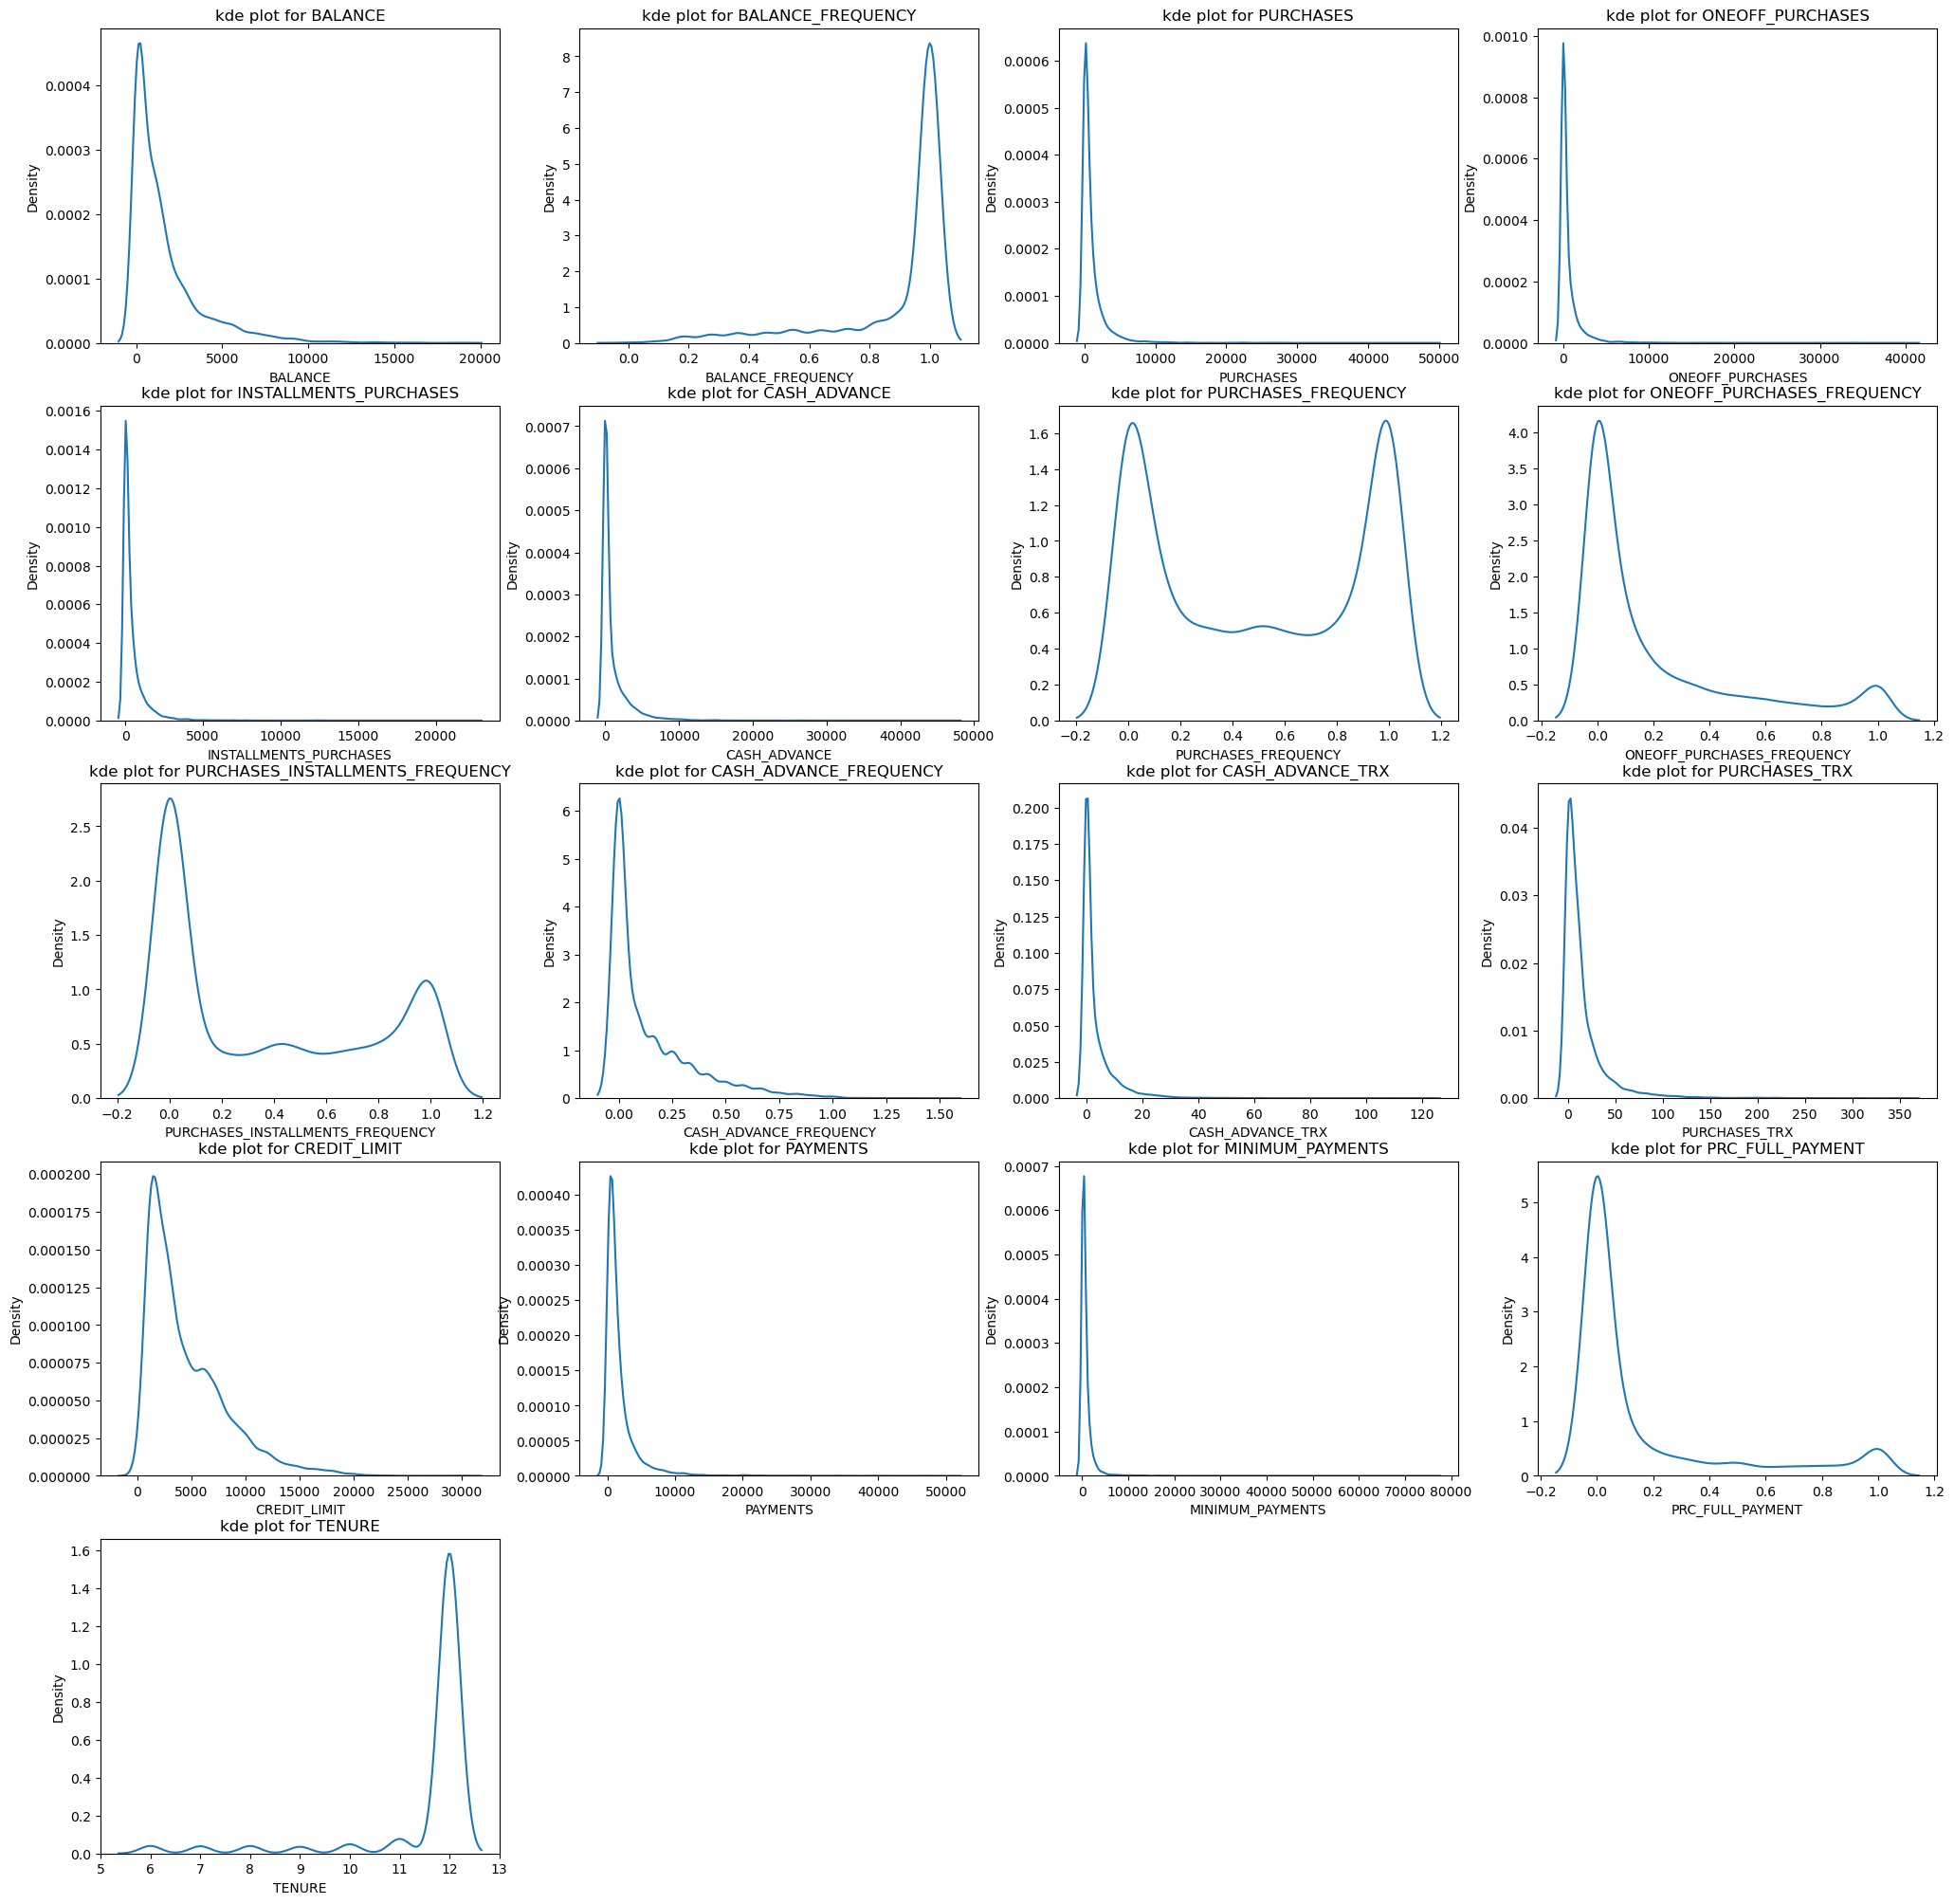

In [16]:
# KDE PLOT
plt.figure(figsize=(25,25))
columns=list(data.columns)
for i in range(0,len(columns)):
    plt.subplot(5,4,i+1)
    sns.kdeplot(x=data[columns[i]])
    plt.title(f'kde plot for {columns[i]}')
    
plt.show()

#### inference:
1. Minimum payments claerly show high kurtosis and left skewness, meaning it has extreme outliers at its right side,i.e majority of the minimum_payments from credit cards lie between '0-5000' dollars.
2. Majority users have credit limit between 1000- 9000 dollars with average credit limit is greater than the credit limit with maximum frequency.
3. most of the customers are using their credit card more often as their balancy frequency is highly skewed towards 1.
4. purchase ferquency is evenly distributed between 'purchased' and 'not being purchased'.

In [17]:
#OUTLIER TREATMENT:-

In [18]:
a  = data.iloc[:,1:].describe(percentiles=[0.01,0.03,0.05,0.95,0.97,0.98,0.99]).T
a = a.iloc[:,1:]
a

,mean,std,min,1%,3%,5%,50%,95%,97%,98%,99%,max
BALANCE_FREQUENCY,0.895035,0.207697,0.000000,0.181818,0.272727,0.363636,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES,1025.433874,2167.107984,0.000000,0.000000,0.000000,0.000000,375.405000,4060.092500,5233.642000,6428.649000,9127.092000,49039.57000
ONEOFF_PURCHASES,604.901438,1684.307803,0.000000,0.000000,0.000000,0.000000,44.995000,2728.372500,3666.489500,4506.919000,6783.896500,40761.25000
INSTALLMENTS_PURCHASES,420.843533,917.245182,0.000000,0.000000,0.000000,0.000000,94.785000,1800.000000,2299.970500,2802.658000,3916.483000,22500.00000
CASH_ADVANCE,994.175523,2121.458303,0.000000,0.000000,0.000000,0.000000,0.000000,4721.415498,6085.695184,7414.039028,9681.634354,47137.21176
PURCHASES_FREQUENCY,0.496000,0.401273,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,0.205909,0.300054,0.000000,0.000000,0.000000,0.000000,0.083333,1.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,0.368820,0.398093,0.000000,0.000000,0.000000,0.000000,0.166667,1.000000,1.000000,1.000000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,0.137604,0.201791,0.000000,0.000000,0.000000,0.000000,0.000000,0.583333,0.666667,0.750000,0.833333,1.50000
CASH_ADVANCE_TRX,3.313918,6.912506,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,20.000000,23.000000,30.000000,123.00000


In [19]:
lower_end_feat = ['BALANCE_FREQUENCY','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS']
upper_end_feat = ['PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_FREQUENCY',
                  'CASH_ADVANCE_TRX','PURCHASES_TRX',
                 'CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS']

In [20]:
def ol_treatment_upper_end(x):
    x = x.clip(upper = x.quantile(0.99))
    return x

def ol_treatment_lower_end(x):
    x = x.clip(lower = x.quantile(0.01))
    return x

In [21]:
data[lower_end_feat] = data[lower_end_feat].apply(ol_treatment_lower_end)
data[upper_end_feat] = data[upper_end_feat].apply(ol_treatment_upper_end)

In [22]:
s2  = data.iloc[:,1:].describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T
s2 = s2.iloc[:,1:]
s2

,mean,std,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
BALANCE_FREQUENCY,0.895463,0.206102,0.181818,0.181818,0.272727,0.272727,0.363636,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,957.557641,1550.381999,0.000000,0.000000,0.000000,0.000000,0.000000,375.405000,4060.092500,5233.642000,6428.649000,9122.432800,9127.092000
ONEOFF_PURCHASES,547.887741,1114.319916,0.000000,0.000000,0.000000,0.000000,0.000000,44.995000,2728.372500,3666.489500,4506.919000,6773.565725,6783.896500
INSTALLMENTS_PURCHASES,393.618189,685.880514,0.000000,0.000000,0.000000,0.000000,0.000000,94.785000,1800.000000,2299.970500,2802.658000,3914.658450,3916.483000
CASH_ADVANCE,950.625518,1796.830695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4721.415498,6085.695184,7414.039028,9678.030188,9681.634354
PURCHASES_FREQUENCY,0.496000,0.401273,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,0.205909,0.300054,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,1.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.368820,0.398093,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,1.000000,1.000000,1.000000,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,0.136455,0.197183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.583333,0.666667,0.750000,0.833333,0.833333
CASH_ADVANCE_TRX,3.148564,5.630223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,20.000000,23.000000,30.000000,30.000000


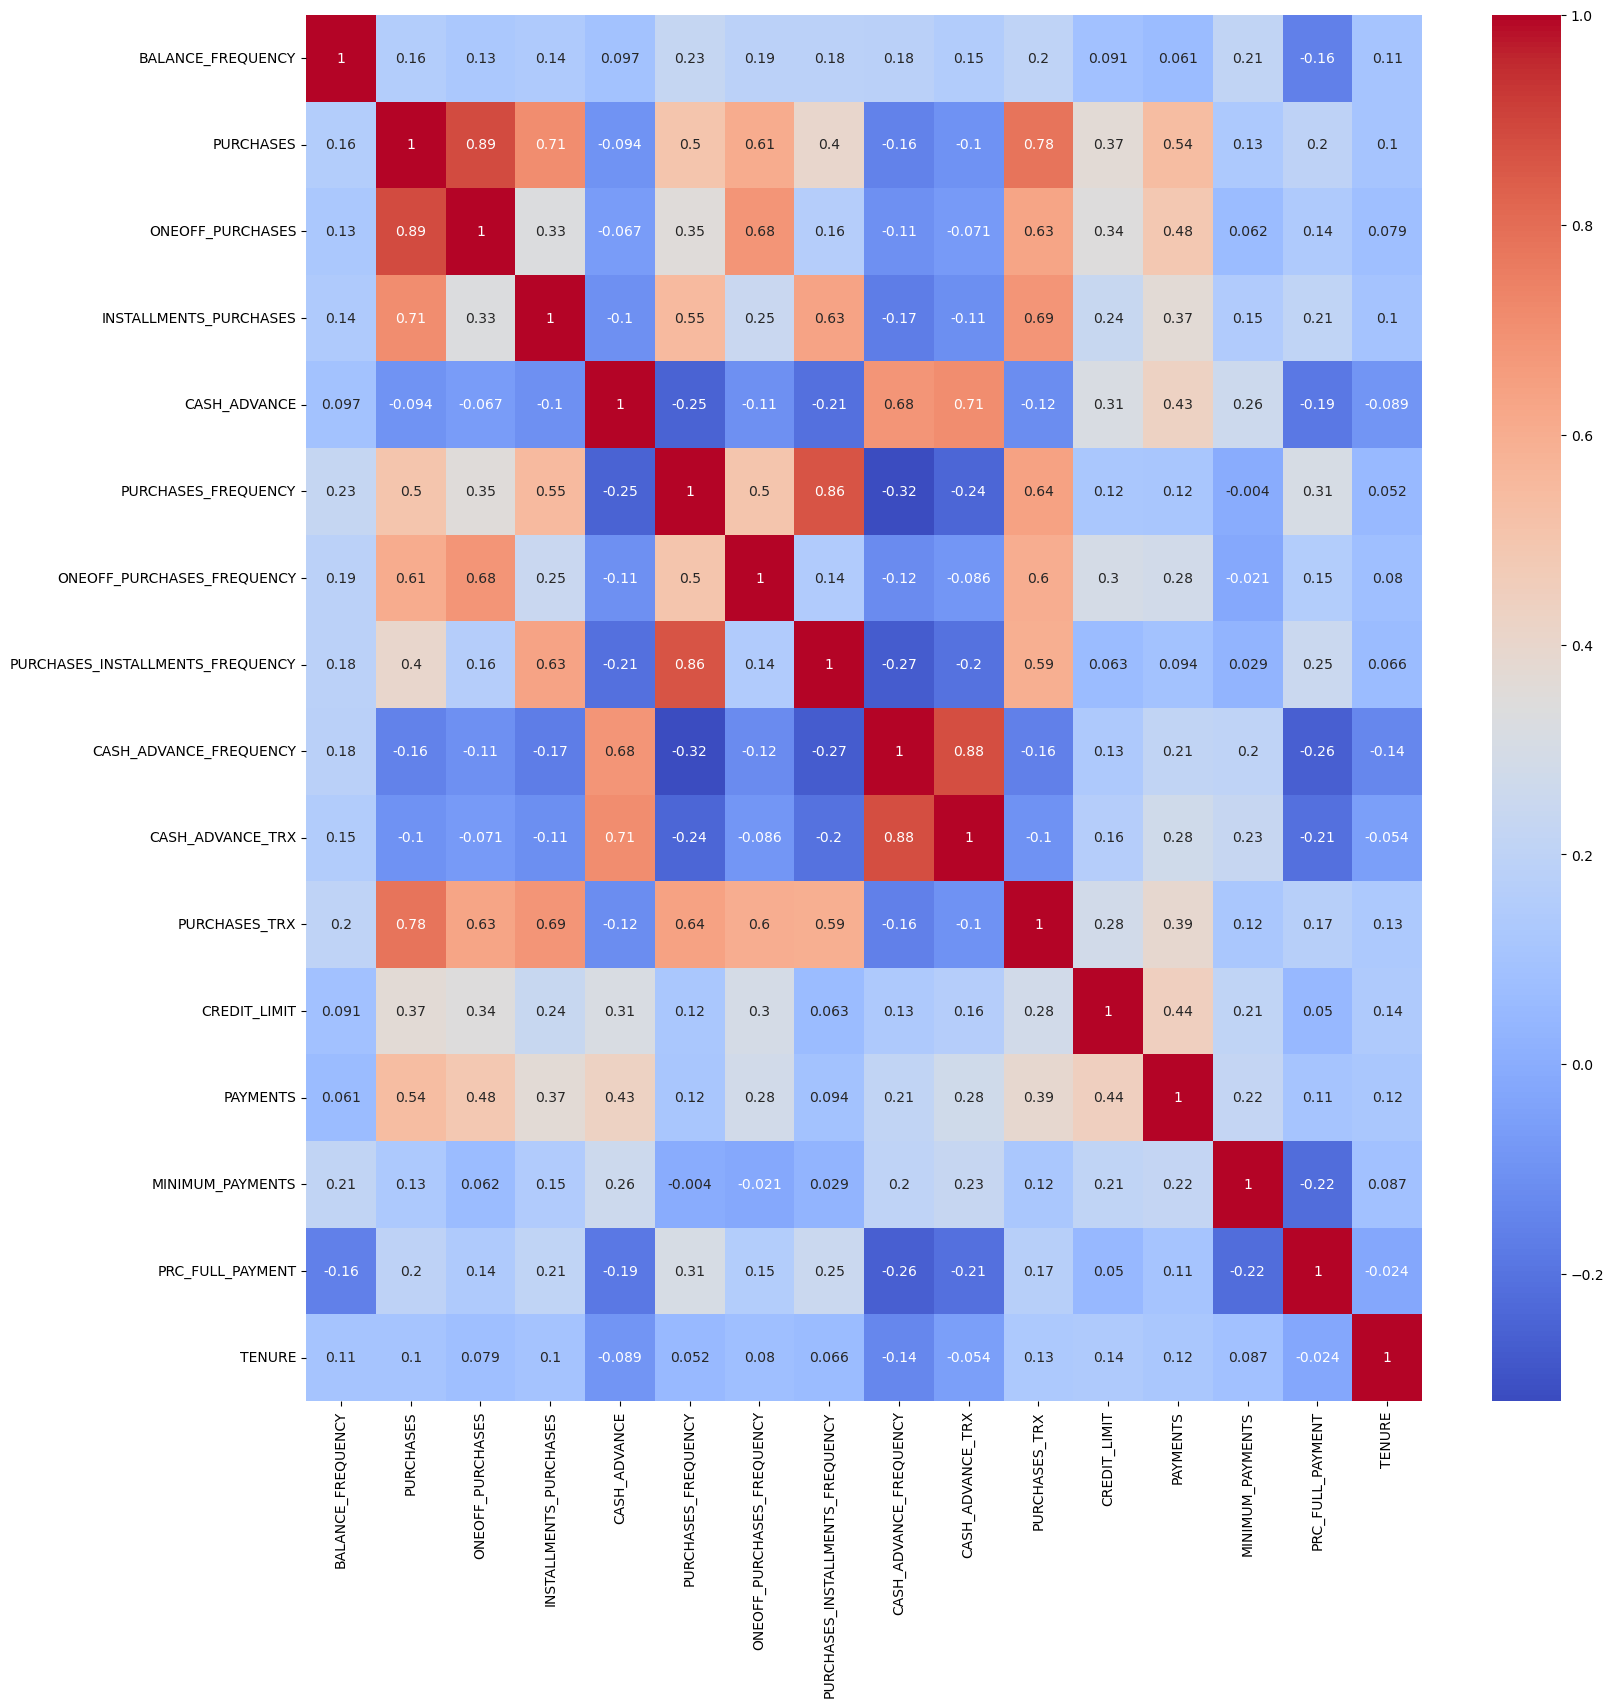

In [23]:
corr = data.iloc[:,1:].corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

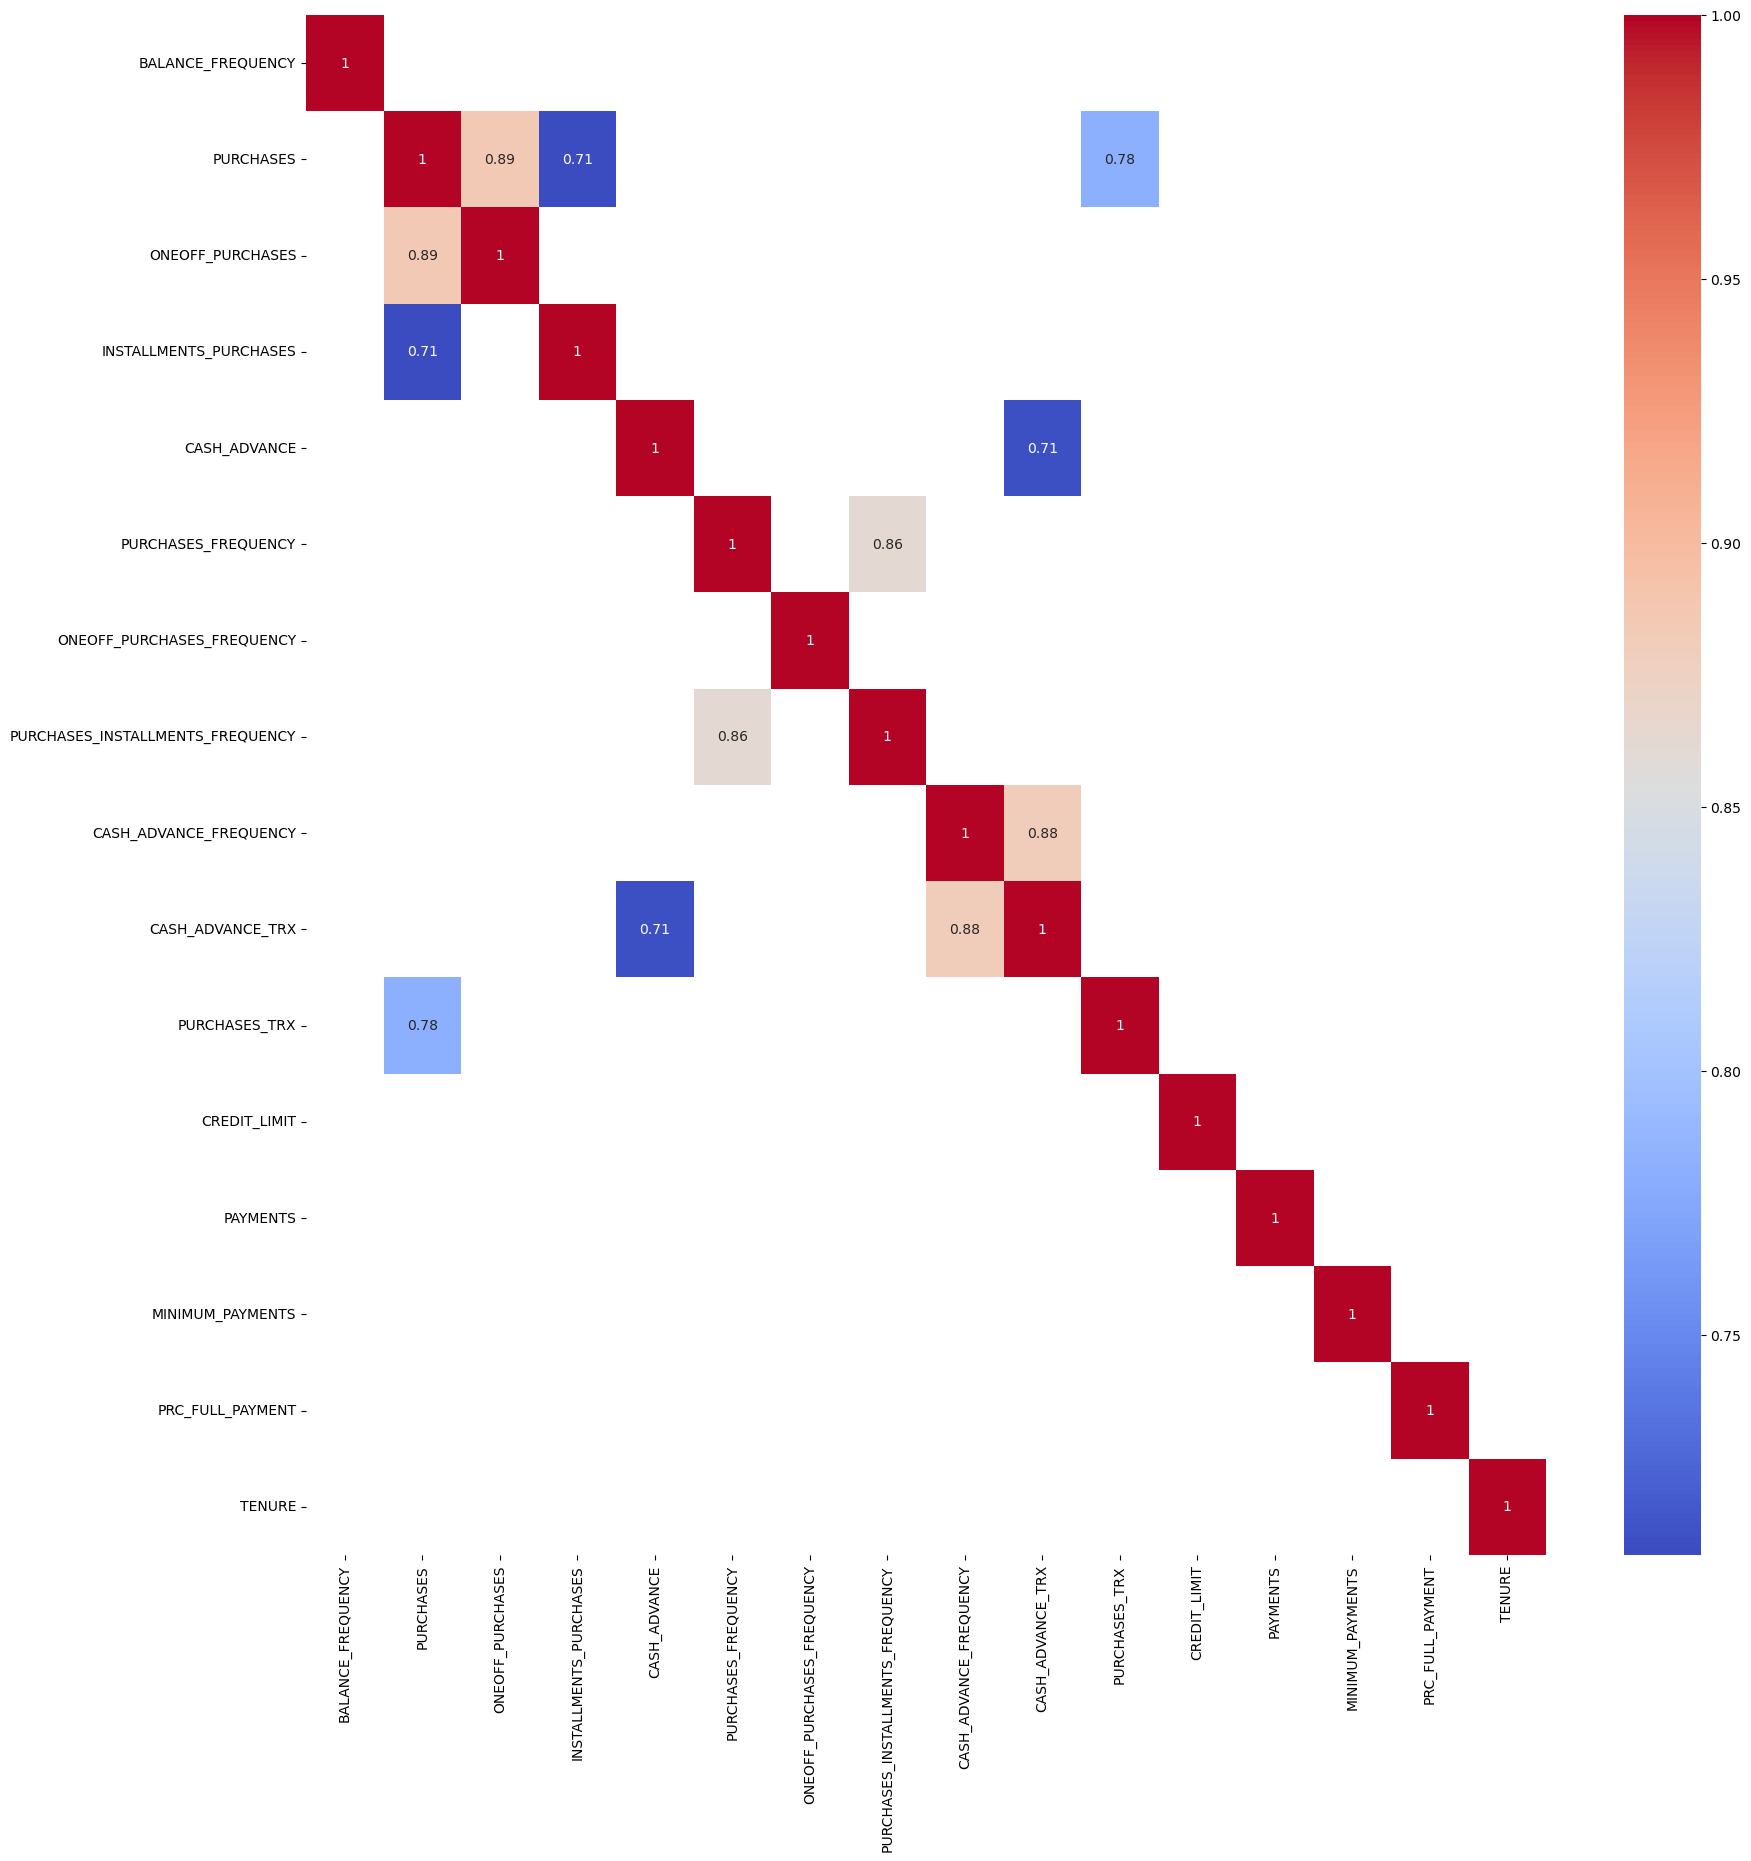

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(corr[abs(corr)>=0.7],annot=True,cmap='coolwarm')
plt.show()

In [25]:
# inference:-
#dropping highly correlated feaures
data.drop(['CASH_ADVANCE_TRX','PURCHASES'],axis=1,inplace=True)
data.shape

(8636, 15)

In [26]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['CUST_ID'], dtype='object')
Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
df['CUST_ID'].nunique()

8636

## APPLYING PCA

In [29]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [30]:
pca = PCA()
pca.fit(data)

data_pcomps = pca.transform(data)

print(data_pcomps.shape)


(8636, 15)


In [31]:
eig_val = pca.explained_variance_
eig_df = pd.DataFrame({'Variance(Eig_val)':eig_val,
                      'EVR':pca.explained_variance_ratio_*100})
eig_df.head()

,Variance(Eig_val),EVR
0,1.695450e+07,58.782154
1,4.475424e+06,15.516538
2,3.632075e+06,12.592599
3,2.012827e+06,6.978581
4,8.273856e+05,2.868590


In [32]:
eig_df['CumSum_EVR'] = np.cumsum(eig_df['EVR'])
eig_df.head(10)

,Variance(Eig_val),EVR,CumSum_EVR
0,1.695450e+07,5.878215e+01,58.782154
1,4.475424e+06,1.551654e+01,74.298692
2,3.632075e+06,1.259260e+01,86.891291
3,2.012827e+06,6.978581e+00,93.869872
4,8.273856e+05,2.868590e+00,96.738462
5,6.053458e+05,2.098767e+00,98.837229
6,3.352194e+05,1.162224e+00,99.999453
7,1.559044e+02,5.405288e-04,99.999993
8,1.598961e+00,5.543683e-06,99.999999
9,1.477947e-01,5.124123e-07,99.999999


In [33]:
w = eig_df[eig_df['CumSum_EVR']<95]
w.tail(10)

,Variance(Eig_val),EVR,CumSum_EVR
0,1.695450e+07,58.782154,58.782154
1,4.475424e+06,15.516538,74.298692
2,3.632075e+06,12.592599,86.891291
3,2.012827e+06,6.978581,93.869872


In [34]:
# 4 features explain almost 93% of the data

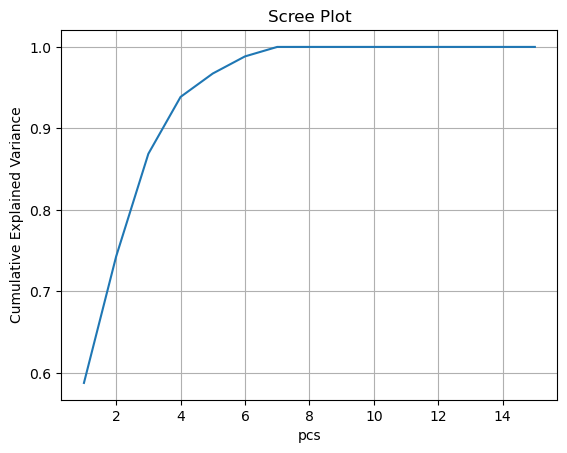

In [35]:
#scree plot
plt.plot(list(range(1,16)),np.cumsum(pca.explained_variance_ratio_))
plt.title('Scree Plot')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('pcs')
plt.grid()
plt.show()

In [36]:
pc_cols = []
for i in range(1,16):
    s = 'PC'+ str(i)
    pc_cols.append(s)
print(len(pc_cols))

15


In [37]:
data_pcomps_df = pd.DataFrame(data_pcomps,columns = pc_cols)
print(data_pcomps_df.shape)
data_pcomps_df.head()

(8636, 15)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-4311.458040,-39.316115,10.565851,-115.542553,-58.015436,117.344178,-89.074555,-2.931426,-0.669815,0.321731,-0.081433,0.057690,0.028320,-0.092624,0.021785
1,4641.563659,3332.023840,-597.794079,-3445.546901,265.509071,-583.150014,81.221478,-0.671615,-0.995016,0.097356,0.191417,0.062241,-0.003893,-0.267377,-0.041886
2,2180.291612,-2377.718664,-1056.536756,440.528040,-396.156820,121.624609,-437.840089,1.088658,-0.248602,-0.280341,-0.142829,-0.831978,0.254231,-0.072806,0.146230
3,-3690.052037,395.951638,-115.857192,233.838621,-275.437935,435.308344,-259.185769,-2.639972,-0.579441,0.326333,-0.057744,-0.068024,-0.102838,-0.149358,-0.026789
4,-2283.985430,1298.716123,-556.170343,1802.581621,1078.179678,208.301162,735.016765,-18.068283,-0.442872,-0.071637,-0.146917,-0.073044,0.009460,-0.078829,0.048536


In [38]:
data_pcomps_df = data_pcomps_df.iloc[:,:4]
print(data_pcomps_df.shape)
data_pcomps_df.head()

(8636, 4)


,PC1,PC2,PC3,PC4
0,-4311.458040,-39.316115,10.565851,-115.542553
1,4641.563659,3332.023840,-597.794079,-3445.546901
2,2180.291612,-2377.718664,-1056.536756,440.528040
3,-3690.052037,395.951638,-115.857192,233.838621
4,-2283.985430,1298.716123,-556.170343,1802.581621


# kmeans clustering

In [39]:
from sklearn.cluster import KMeans

In [40]:
# within cluster sum of square
wcss = []
for i in range(1,10):
    model = KMeans(n_clusters=i)
    model.fit(data_pcomps_df)
    wcss.append(model.inertia_)
    
# model.inertia_ returns the WCSS values
print('WCSS\n',wcss)

WCSS
 [233791094660.5479, 134092139851.56503, 106703205579.50359, 91637707814.53851, 80470541950.94768, 71485656179.46793, 64962172667.115685, 59818161044.483055, 55404115404.02621]


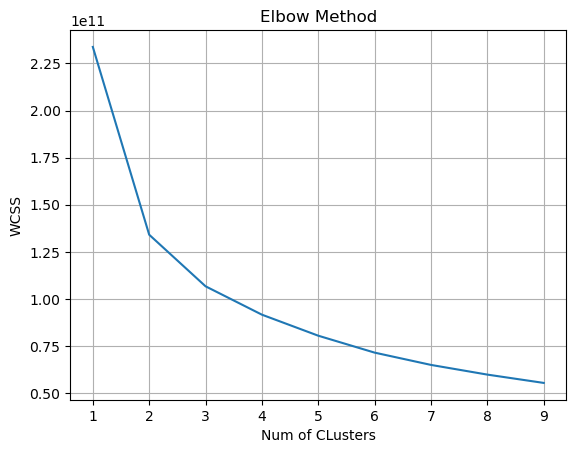

In [41]:
plt.plot(list(range(1,10)),wcss)
plt.title('Elbow Method')
plt.xlabel('Num of CLusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [42]:
# 2 or 3 may be the optimum level of clusters

# Silhoutte score

In [43]:
from sklearn.metrics import silhouette_score

In [44]:
for i in range(2,10): # i = no of clusters
    m = KMeans(n_clusters=i,random_state=0).fit(data_pcomps_df)
    print(f'Silhoutte Score at K={i}',silhouette_score(data_pcomps_df,m.labels_))

Silhoutte Score at K=2 0.5108744973967531
Silhoutte Score at K=3 0.42502422522180755
Silhoutte Score at K=4 0.4037559576821988
Silhoutte Score at K=5 0.37828143068604964
Silhoutte Score at K=6 0.39433964536504046
Silhoutte Score at K=7 0.3959797687710428
Silhoutte Score at K=8 0.37613212701745075
Silhoutte Score at K=9 0.344485133504548


In [ ]:
# k=2 has highest Silhoutte score

In [45]:
from collections import Counter
def K_cluster_analysis(k,table):
    model = KMeans(n_clusters=k,random_state=0)
    model.fit(table)
    ypred = model.predict(table)
    print(Counter(ypred))
    cent = model.cluster_centers_
    table[f'Cls{k}'] = ypred
    r1 = table.drop(f'Cls{k}',axis=1).mean().reset_index().T
    r1.columns = r1.loc['index']
    r1 = r1.iloc[1:,]
    r1.index = ['Mean']
    r2 = table.groupby(f'Cls{k}').mean()
    cls_analysis = pd.concat([r1,r2]).T
    return cls_analysis

In [46]:
cls2_report = K_cluster_analysis(2,data_pcomps_df)
cls2_report

Counter({0: 6502, 1: 2134})


,Mean,0,1
PC1,-0.0,-1945.670141,5928.18522
PC2,-0.0,41.531547,-126.540825
PC3,-0.0,25.581058,-77.941911
PC4,-0.0,31.657393,-96.455654


In [47]:
cls3_report = K_cluster_analysis(3,data_pcomps_df)
cls3_report

Counter({1: 5400, 2: 2464, 0: 772})


,Mean,0,1,2
PC1,-0.0,9416.543915,-2531.060845,2596.654489
PC2,-0.0,1956.957641,294.696462,-1258.982222
PC3,-0.0,-185.757083,-3.383369,65.614717
PC4,-0.0,-50.412433,62.291097,-120.719775
Cls2,0.247105,1.0,0.0,0.55276


In [48]:
k2 = KMeans(n_clusters=2)
k2.fit(data_pcomps_df)

KMeans(n_clusters=2)

In [49]:
ypred_k2 = k2.predict(data_pcomps_df)
print(ypred_k2[:10])

[1 0 0 1 1 0 1 1 0 1]


In [50]:
c1 = Counter(ypred_k2)
print(c1)

Counter({1: 6502, 0: 2134})


In [51]:
df0=data_pcomps_df.copy()
df1=data_pcomps_df.copy()

In [52]:
df0['Cls2'] = ypred_k2
df0.head()

,PC1,PC2,PC3,PC4,Cls2,Cls3
0,-4311.458040,-39.316115,10.565851,-115.542553,1,1
1,4641.563659,3332.023840,-597.794079,-3445.546901,0,0
2,2180.291612,-2377.718664,-1056.536756,440.528040,0,2
3,-3690.052037,395.951638,-115.857192,233.838621,1,1
4,-2283.985430,1298.716123,-556.170343,1802.581621,1,1


In [53]:
cluster_counts2 = data_pcomps_df['Cls2'].value_counts()

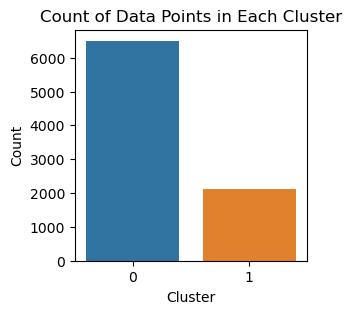

In [58]:
plt.figure(figsize=(3, 3))
sns.barplot(x=cluster_counts2.index, y=cluster_counts2.values)

plt.title('Count of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')

# Show the plot
plt.show()

In [55]:
df0.head()

,PC1,PC2,PC3,PC4,Cls2,Cls3
0,-4311.458040,-39.316115,10.565851,-115.542553,1,1
1,4641.563659,3332.023840,-597.794079,-3445.546901,0,0
2,2180.291612,-2377.718664,-1056.536756,440.528040,0,2
3,-3690.052037,395.951638,-115.857192,233.838621,1,1
4,-2283.985430,1298.716123,-556.170343,1802.581621,1,1


In [56]:
cluster_counts3 = data_pcomps_df['Cls3'].value_counts()

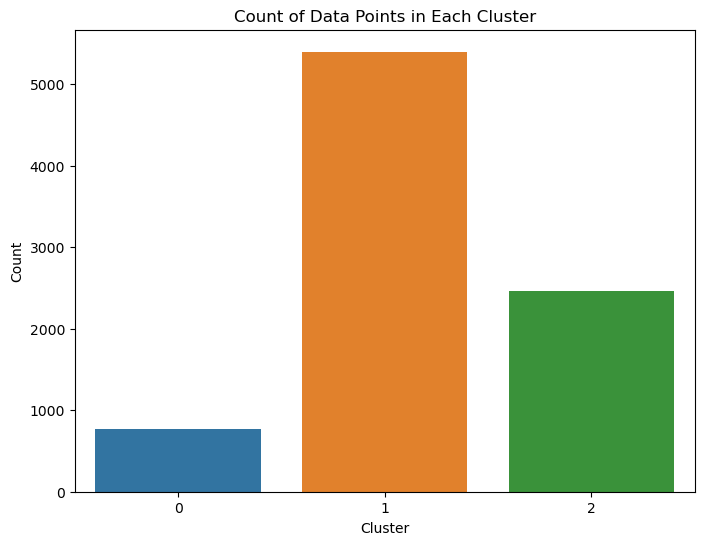

In [57]:
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts3.index, y=cluster_counts3.values)
plt.title('Count of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')

# Show the plot
plt.show()